In [1]:
load('../../F21-ETALA/etala_utilities.sage')

# SMP exam fall 2020

## Problem 1:   Probability theory


Firstly, formalizing the given information the following statements are given. The event of a sunny day will be abbreviated $SD$ it's given that:  
$ P(SD | F) = 0.46 $  
$ P(SD | S) = 0.63 $  
$ P(SD | E) = 0.32 $  
$ P(SD | V) = 0.12 $  
Furthermore, since the seasons are taken to all be three months:  
$P(F) = P(S) = P(E) = P(V) = \frac{3}{12} = 0.25 $

### a)

The probability that a winter day is not a sunny day ($P(SD^C|V)$) can be found through the relation  
$P(A^C|C) = 1 - P(A|C)$  
leading to the following:  
$ P(SD^C|V) = 1 - P(SD|V) = 1 - 0.12 = 0.88 $  
Or in other words, __there's an 88% chance that it will rain on a given winter day.__

### b)

The probability that any given day during the year will be sunny ($P(SD)$), can be found as the weigted average of the conditional probabilities, using the probability of the condition as weights:  
$ P(A) = \sum_{i=1}^n{P(A|B_i)P(B_i)} $  
In this case, each of the conditions are equally probable, and the total probability of a sunny day is simply:  
$ P(SD) = \frac{P(SD|F) + P(SD|S) + P(SD|E) + P(SD|V)}{4} = \frac{0.46 + 0.63 + 0.32 + 0.12}{4} = 0.3825 $  
Meaning that __there's a 38% chance that any given day of the year will be sunny__.

### c)

Finding the reversed conditional probability of a spring day given that it's sunny ($P(F|SD)$), can be done using Bayes formula:  
$P(F|SD) = \frac{P(SD|F)P(F)}{P(SD)} = \frac{0.46\cdot0.25}{0.3825} = 0.3007$  
and so __the probability that any given sunny day is a spring day is about 30%__.

## Problem 2:  Stochastic Variables

### a)

For the given function to be a valid pdf, it must fulfill three criteria:  
$$ f(x) \ge 0 \text{ for all } x $$  
$$ \int_{-\infty}^{\infty}{f(x)}dx = 1 $$  
$$P(a < X < b) = \int_a^b{f(x)}dt \text{ for all } a, b \in \Bbb R, \text{ where } a \le b $$  
Using the second statement, on the above piecewise function:  
$ \begin{align} && \int_{-2}^0{a(x+2)}dx + \int_{0}^2{-a(x-2)}dx & = 1 \\
\Leftrightarrow &&                                       2a + 2a & = 1 \\
\Leftrightarrow &&                                            4a & = 1 \\
\Leftrightarrow &&                                             a & = \frac14 
\end{align}$  
Using this value for a, the pdf can be sketched:

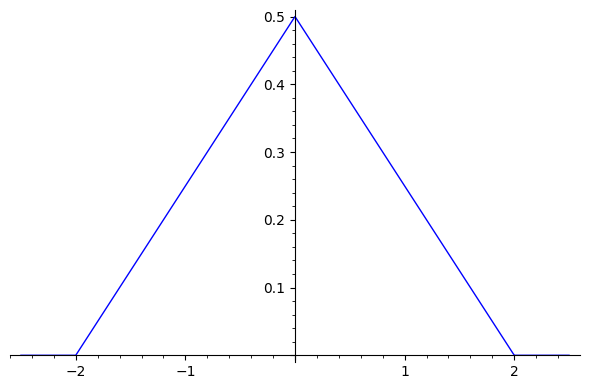

In [2]:
var('x')
a = 1/4
f_X(x) = piecewise([[(-oo, -2), 0], [[-2, 0], a*(x+2)], [RealSet.open_closed(0, 2), -a*(x-2)], [(2, oo), 0]])
plot(f_X, xmin=-2.5, xmax=2.5)

From the plot it is also clear that the first condition is fulfilled, since the entire curve is in the positive domain.

### b)

Since the cdf is just the pdf integrated, and piecewise functions are integratable in sage, this is very easily done:  

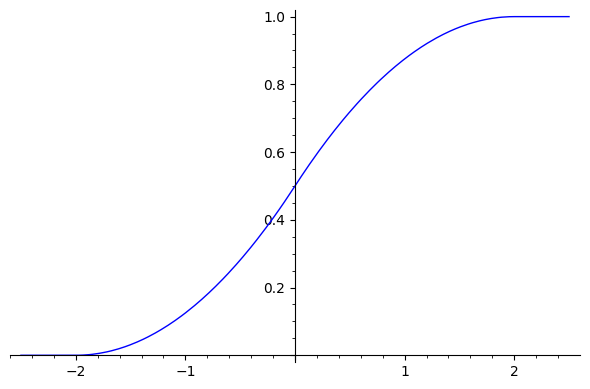

In [3]:
F_X(x) = f_X.integral()
plot(F_X, xmin=-2.5, xmax=2.5)

To check the result it is noted that the cdf starts at zero at the lower bound of X climbing continually to 1 at the upper bound of X, as expected.

### c)

The mean $EX$ can be determined by integrating the product of the value and the probability of that value over the range of the function:  
$EX = \int x f(x) dx$  
while the variance being defined as the mean of the square of the deviation from the mean ($Var(X) = E[(X-EX)^2]$), can be determined as follows:  
$Var(X) = E\left(X^2\right) - EX^2 = \int{x^2 f(x)}\,dx - {EX}^2$  

In [4]:
mean_X = multiply_piecewise(f_X, x).integral(definite=True); show_var()
var_X = multiply_piecewise(f_X, x^2).integral(definite=True) - mean_X^2; show_var()

\text{mean_X} = 0

\text{var_X} = \frac{2}{3}

### d)

Given that X is a continuous stochastic variable, $P(X=x) = 0 \text{ for all } X$, and so __$P(X=0) = 0$__.

### e)

The probability that $X$ is in the range $[-1, 1]$ is most easily calculated from the cdf since it follows from the third characteristic of the pdf listed above that the probability is given by $\int_{-1}^1{f_X(x)}dx$ which is just the difference of the cdf on the limits, since the cdf is the integral of the pdf: 

In [5]:
F_X(1) - F_X(-1)

3/4

So __the probability of X being larger than -1 and smaller than 1 is $\frac34$__.

## Problem 3

### a)

Firstly a method is defined for generating a realization of the given function, by sampling the relevant distribution classes in scipy.stat

<IPython.core.display.Javascript object>


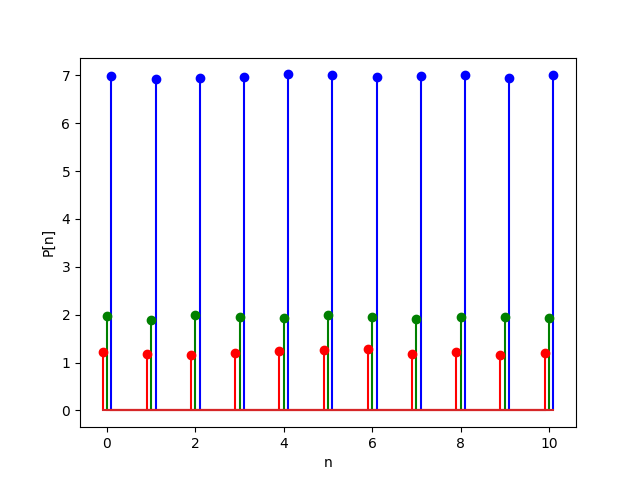

In [1]:
%matplotlib notebook
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
def realization_of_p(n):
    sample_len = len(n)
    Y = norm.rvs(-2, 0.01, sample_len)
    W = uniform.rvs(3, 5)
    return [3*Y[i] + 2 * W for i in range(sample_len)]

num_realizations = 3
_n = range(11)
offset = 0.1
fmt = ['r', 'g', 'b']
realizations = [realization_of_p(_n) for _ in range(num_realizations)]
fig, ax = plt.subplots()
for i in range(num_realizations):
    ax.stem([-offset + i*offset + n for n in _n], realizations[i], fmt[i], fmt[i]+'o')
    ax.set_xlabel('n')
    ax.set_ylabel('P[n]')
fig.show()

### b)

To find the ensemble mean, the expression for the process is analyzed, and the mean derived algebraically from it's parts. The distibution of Y is parameterized by it's mean, so this can be determined without further calculations. The distibution of W is uniform, and the average is therefore the midpoint between the bounds of the distribution. Putting this together with the formula for P[n], the mean becomes:  
$E[P] = 3 E[Y] + 2 E[W] = 3 \cdot (-2) + 2 \cdot \frac {3+5}{2} = 2$  
The variance is calculated the same way. Again the normal distribution is parameterized by the variance directly, while the variance of the uniform distribution, must be calculated. The variance of a uniform distribution is $\frac{(b - a)^2}{12}$:  
$Var(P) = 9 Var(Y) + 4 Var(W) = 9 \cdot 0.01 + 4 \cdot \frac {(5-3)^2}{12} = 1.423$  

### c)

Since n only appears as $Y[n]$ in the definition of $P$, and $Y[n]$ is specified to be i.d.d., __the process is wide sense stationary__.  
Given that the average of any single realization depends strongly on the fixed value of $W$, __the process is not ergodic__.

## Problem 4

### a)

Since each test is performed identically for the two products, a __paired t-test__ is possible, and might help reduce variance caused by the differences between the conditions of each test.

### b)

To test if the data is normally distributed, a QQ plot of the data is produced using scipy.stats:

<IPython.core.display.Javascript object>


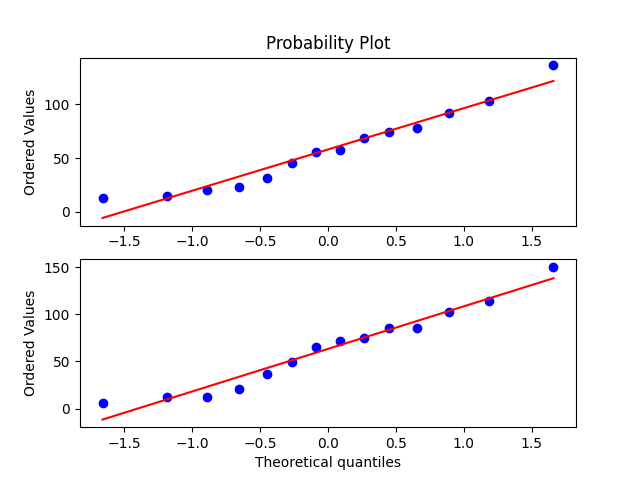

\text{fit_A} = \left(38.389210654338264, 58.07142857142857, 0.9764160934958682\right)

\text{fit_B} = \left(45.12329902921107, 63.35857142857144, 0.9804964002846023\right)

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.stats import probplot
A = [31.2, 55.3, 74.0, 15.1, 68.6, 45.6, 103.1, 92.3, 20.1, 12.8, 57.2, 78.0, 23.2, 136.5]
B = [36.6, 71.4, 85.9, 12.0, 75.1, 49.9, 113.7, 102.2, 20.6, 12.2, 65.5, 85.22, 6.3, 150.4]
fig, axs = plt.subplots(2)
_, fit_A = probplot(A, plot=axs[0])
_, fit_B = probplot(B, plot=axs[1])
axs[0].set_xlabel('')
axs[1].set_title('')
fig.show()
show_var('fit_A', 'fit_B')

Since the QQ plots show a decent linear fit ($R^2$ of about 0.98 in both data sets), the data can be assumed to be normally distributed

### c)

In order to test whether product A is more efficient than product B, the null hypothesis will be that the products are equally efficient, or in other words, use the same amount of power. Since the test is performed as a paired test, the null hypothesis will be that the mean of the difference is zero:  
$H_0\text{:}\;\; \mu_D = 0$, where $D_i = A_i - B_i$  
With $D$ defined as above, the alternative hypothesis will be:  
$H_1\text{:}\;\; \mu_D \ne 0$

### d)

In [19]:
import scipy.stats
D = [a-b for a, b in zip(A, B)]
n_ = len(D)
D_mean = mean(D); show_var()
D_var = variance(D); show_var()
t = D_mean/(D_var/sqrt(n_)); show_var()
pval = 2*(1-scipy.stats.t.cdf(float(abs(t)), int(n_-1))); show_var()

\text{D_mean} = -5.28714285714286

\text{D_var} = 70.7533912087912

\text{t} = -0.0747263525721425 \, \sqrt{14} \sim -0.280

\text{pval} = 0.7841831980380387 \sim 0.784

### e)

In [18]:
t_0 = scipy.stats.t.ppf(1-0.05/2, n_-1)
upper = D_mean + t_0; show_var()
lower = D_mean - t_0; show_var()

\text{upper} = -3.1267742006818473 \sim -3.13

\text{lower} = -7.447511513603873 \sim -7.45

### f)

Given that the p value is very large, the null hypothesis cannot be rejected based on these data,